# Project: GAPMINDER WORLD


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> the project aims to build correlations between different indicators on human life in different countries. the indicators used were : 
>1 - human development index : index to measure the life expectancy, eduation and income in countries 
>2 - agriculture land percentage : index to measure the activity of agriculture
>3 - income per person : to measure life standards according to income
>4 - children per woman : measure of kids born per woman
>5 - CO2 emissions : measure of carbon emmission per person.
>6 - life expectancy : measures average lives in each country 
>7 - energy usage per person : measures kg of oil equivalent per capita for each person



In [14]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from functools import reduce


<a id='wrangling'></a>
## Data Wrangling

> In this section, data are collected based on indicies wanted and year for countries available. Note that year 2014 was selected as this was most recent year for energy use per person

### General Properties

this section of code calles data needed for 2014 year

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
agri = pd.read_csv('agricultural_land_percent_of_land_area.csv')[['country' , '2014']]
child = pd.read_csv('children_per_woman_total_fertility.csv')[['country' , '2014']]
co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')[['country' , '2014']]
energy = pd.read_csv('energy_use_per_person.csv')[['country' , '2014']]
hdi = pd.read_csv('hdi_human_development_index.csv')[['country' , '2014']]
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')[['country' , '2014']]
life = pd.read_csv('life_expectancy_years.csv')[['country' , '2014']]


> This section is conserned with merging data for each country with the corresponding selected indicies. Moreover, it also concerned with fixing data types to achieve clean data frame to explore conclusions on it

### Data Cleaning (Merging data frames to achive one data frame with each country with corresponding indicies!)

this line renames columns and set index to country column

In [16]:
lst = [agri,child,co2,energy,hdi,income,life]
names = ['agricultural_land_percent','children_per_woman','co2_emissions','energy_use_per_person','hdi','income','life_expectancy']
for i in range(len(lst)):
    lst[i].rename(columns={'2014': names[i]}, inplace=True)

this line is concerned with merging multible dfs into single one.

In [17]:
df = reduce(lambda left,right: pd.merge(left,right,on='country'), lst)
df.set_index(['country'],inplace = True)
df.head(5)

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Angola,43.90,5.84,1.64,545,0.557,8240,63.0
Albania,42.90,1.71,1.90,808,0.787,11.6k,78.2
United Arab Emirates,5.39,1.78,24.20,7650,0.847,62.4k,73.0
Argentina,54.30,2.32,4.56,2030,0.825,23.6k,76.5
Armenia,59.00,1.69,1.91,1020,0.746,11k,75.2


Investigating null values in the manipulated df

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, Angola to Zimbabwe
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   agricultural_land_percent  165 non-null    float64
 1   children_per_woman         165 non-null    float64
 2   co2_emissions              165 non-null    float64
 3   energy_use_per_person      132 non-null    object 
 4   hdi                        165 non-null    float64
 5   income                     165 non-null    object 
 6   life_expectancy            165 non-null    float64
dtypes: float64(5), object(2)
memory usage: 10.3+ KB


In [19]:
df.energy_use_per_person.isnull().sum()

33

it seems that the energy coloumn is the only one with missing values. and it is missing with 33 value. As the data exhibit no battern between countries in the df. it is better to drop rows with those nulls

As a part of cleaning data, Nan values should be droped. this was handled in this line.

In [20]:
df.dropna(inplace = True)

it was noticed that income and energy use per person columns need to be normalized to floats. Note that the data are written in different formats (10k stands for 10000).

In [21]:
df.income = df.income.replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(float)


In [22]:
df.energy_use_per_person = df.energy_use_per_person.replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(float)


checking that columns meet expectaions 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, Angola to South Africa
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   agricultural_land_percent  132 non-null    float64
 1   children_per_woman         132 non-null    float64
 2   co2_emissions              132 non-null    float64
 3   energy_use_per_person      132 non-null    float64
 4   hdi                        132 non-null    float64
 5   income                     132 non-null    float64
 6   life_expectancy            132 non-null    float64
dtypes: float64(7)
memory usage: 8.2+ KB


showing data cleaned 

In [24]:
df.head()

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Angola,43.90,5.84,1.64,545.0,0.557,8240.0,63.0
Albania,42.90,1.71,1.90,808.0,0.787,11600.0,78.2
United Arab Emirates,5.39,1.78,24.20,7650.0,0.847,62400.0,73.0
Argentina,54.30,2.32,4.56,2030.0,0.825,23600.0,76.5
Armenia,59.00,1.69,1.91,1020.0,0.746,11000.0,75.2


saving to clean csv file

In [25]:
df.to_csv('clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> Now, data is cleaned as ready to investigated. we are about to call the clean csv as start analysing !

### 1 - How can agricultural land percent affect life expectancy ?!

Calling csv file 

In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = pd.read_csv('clean.csv').set_index('country')

In [27]:
df.head()

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Angola,43.90,5.84,1.64,545.0,0.557,8240.0,63.0
Albania,42.90,1.71,1.90,808.0,0.787,11600.0,78.2
United Arab Emirates,5.39,1.78,24.20,7650.0,0.847,62400.0,73.0
Argentina,54.30,2.32,4.56,2030.0,0.825,23600.0,76.5
Armenia,59.00,1.69,1.91,1020.0,0.746,11000.0,75.2


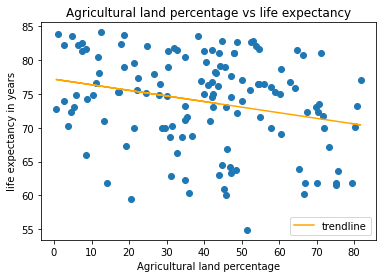

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.scatter(df.agricultural_land_percent,df.life_expectancy)
parameters = np.polyfit(df.agricultural_land_percent, df.life_expectancy, 1)
trend_line = np.poly1d(parameters)
plt.plot(df.agricultural_land_percent, trend_line(df.agricultural_land_percent), "orange",label="trendline")
plt.legend(loc = 'lower right')
plt.title('Agricultural land percentage vs life expectancy')
plt.xlabel('Agricultural land percentage')
plt.ylabel('life expectancy in years');

it seems that people with high agricultural area have shorter life. while people living in countries with high agricutral area percentage are associated with agriculture, it seems that working as a farmer is quite hard and consuming

### 2 - Are there a relation between the co2 emissions and agricultural land percentage ?!

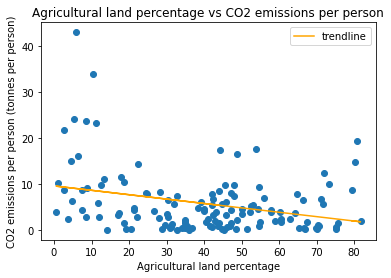

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df.agricultural_land_percent,df.co2_emissions)
parameters = np.polyfit(df.agricultural_land_percent, df.co2_emissions, 1)
trend_line = np.poly1d(parameters)
plt.plot(df.agricultural_land_percent, trend_line(df.agricultural_land_percent), "orange",label="trendline")
plt.legend(loc="upper right")
plt.title('Agricultural land percentage vs CO2 emissions per person')
plt.xlabel('Agricultural land percentage')
plt.ylabel('CO2 emissions per person (tonnes per person)');

it seems quite resonable to see that there is a negative correalation between agricultural land percentage and CO2 emissions.

### 3 - Are people with high incomes expected to live more ?!

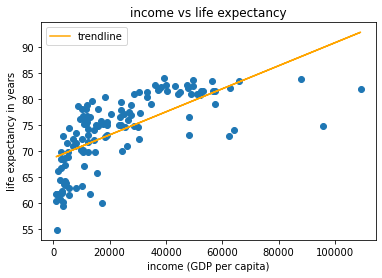

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df.income,df.life_expectancy)
parameters = np.polyfit(df.income, df.life_expectancy, 1)
trend_line = np.poly1d(parameters)
plt.plot(df.income, trend_line(df.income), "orange",label="trendline")
plt.legend(loc="upper left")
plt.title('income vs life expectancy')
plt.ylabel('life expectancy in years')
plt.xlabel('income (GDP per capita)');

it can be seen that people with more income are more likely to have longer life. this may indicate that income facilitate their life and provide the with better medical assurance.

### 4 - Is there any realation between having a high living level and having more kids ?! 

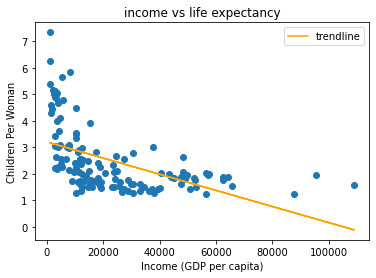

In [31]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df.income,df.children_per_woman)
parameters = np.polyfit(df.income, df.children_per_woman, 1)
trend_line = np.poly1d(parameters)
plt.plot(df.income, trend_line(df.income), "orange",label="trendline")
plt.legend(loc="upper right")
plt.title('income vs life expectancy')
plt.ylabel('Children Per Woman')
plt.xlabel('Income (GDP per capita)');

it seems that people with high living class tends to have less children. it can be also explained as people with more money can get pleased with alternatives other than having sex and children.

### 5 - How can the energy usage affect the life expectancy of people !? 

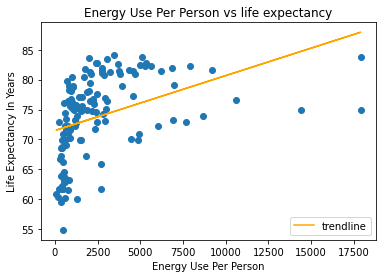

In [32]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df.energy_use_per_person,df.life_expectancy)
parameters = np.polyfit(df.energy_use_per_person, df.life_expectancy,1)
trend_line = np.poly1d(parameters)
plt.plot(df.energy_use_per_person, trend_line(df.energy_use_per_person), "orange",label="trendline")
plt.legend(loc = 'lower right')
plt.title('Energy Use Per Person vs life expectancy')
plt.xlabel('Energy Use Per Person')
plt.ylabel('Life Expectancy In Years');

analysis shows that people with more daily energy used are more likely to live more as this energy is used to facilitate their daily tasks. So, they do not have to be consumed.

### 6 - How can investing in people life affect there income and living level !?

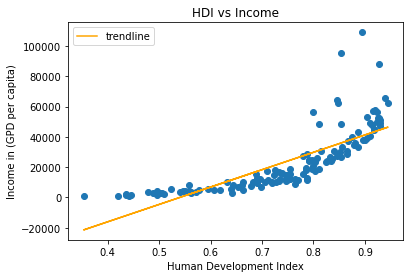

In [33]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df.hdi,df.income)
parameters = np.polyfit(df.hdi,df.income,1)
trend_line = np.poly1d(parameters)
plt.plot(df.hdi, trend_line(df.hdi), "orange",label="trendline")
plt.legend(loc = 'upper left')
plt.title('HDI vs Income')
plt.xlabel('Human Development Index')
plt.ylabel('Income in (GPD per capita)');


this analysis shows that countries concerned with people health ,edication levels and living standards are more likely to have higher incomes.

### 7 - Give insights about the income of people ?!

In [59]:
df.query('income == income.max()')

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Luxembourg,53.9,1.56,17.7,6860.0,0.895,109000.0,82.0


In [60]:
df.query('income == income.min()')

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
"Congo, Dem. Rep.",14.2,6.24,0.0628,389.0,0.441,1030.0,61.8


According to previous plots, it seems that income data have outliers. to get more reliable insights about the income along countries, those data should be droped from analysis.

In [61]:
df.query('income < 80000').describe()

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,40.404612,2.512093,5.408991,2404.002326,0.738915,21465.193798,73.719380
std,20.900223,1.235873,5.861687,2704.628381,0.141127,17572.070573,6.848096
min,0.565000,1.240000,0.062800,66.300000,0.353000,1030.000000,54.900000
25%,24.800000,1.670000,1.440000,650.000000,0.660000,7940.000000,69.900000
50%,42.200000,2.070000,3.870000,1540.000000,0.754000,15300.000000,75.000000
75%,54.600000,2.960000,7.490000,2930.000000,0.847000,30700.000000,79.000000
max,81.700000,7.340000,33.900000,17900.000000,0.945000,65800.000000,84.100000


Now lets figure out how many countries are above the mean, and how many below

In [83]:
avg = df.query('income < 80000').income.mean()

Number of countries above mean

In [72]:
len(df.query('income > {}'.format(avg)))

54

Number of countries below mean

In [73]:
len(df.query('income < {}'.format(avg)))

78

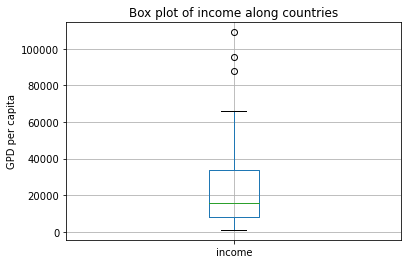

In [82]:
plt.title('Box plot of income along countries')
plt.ylabel('GPD per capita')
df.boxplot(column = 'income');

### 8 - Give insights about HDI ?!

Getting the minimum country with hdi 

In [86]:
df.query('hdi == hdi.min()')

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Niger,36.1,7.34,0.107,150.0,0.353,1130.0,60.4


In [87]:
df.query('hdi == hdi.max()')

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Norway,2.7,1.87,8.74,5600.0,0.945,62600.0,82.2


### 9 - Give insights about life expectancy ?!

Getting the country with max life expectancy

In [88]:
df.query('life_expectancy == life_expectancy.max()')

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Japan,12.4,1.43,9.88,3470.0,0.904,39400.0,84.1


Getting the country with min life expectancy

In [89]:
df.query('life_expectancy == life_expectancy.min()')

,agricultural_land_percent,children_per_woman,co2_emissions,energy_use_per_person,hdi,income,life_expectancy
country,,,,,,,
Mozambique,51.5,5.37,0.314,443.0,0.42,1220.0,54.9


getthing the mean life of people along the country 

In [90]:
df.life_expectancy.mean()

73.86742424242425

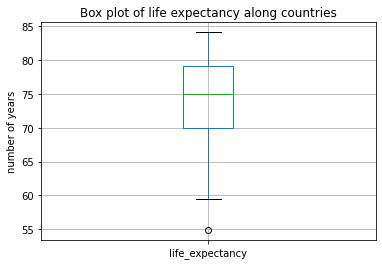

In [91]:
plt.title('Box plot of life expectancy along countries')
plt.ylabel('number of years')
df.boxplot(column = 'life_expectancy');

<a id='conclusions'></a>
## Conclusions
> Well, it seems that this is the end of the introduced analysis. At first it was a quite hard task to collect, clean data to have data ready to be visualized. the project aimed to show some significant indices effect on people and how people are behaving in differnet countries and at different living levels. it also shows how can providing people with high standard living conditions can long there lives.

### Results: Our data analysis suggest that: 

1 - it seems that people with high agricultural area have shorter life. while people living in countries with high agricutral area percentage are associated with agriculture, it seems that working as a farmer is quite hard and consuming

2 - there is a negative correalation between agricultural land percentage and CO2 emissions in countries handled.

3 - people with more income are more likely to have longer life. this may indicate that income facilitate their life and provide the with better medical assurance.

4 - people with high living class tends to have less children. it can be also explained as people with more money can get pleased with alternatives other than having sex and children.

5 - people with more daily energy used are more likely to live more as this energy is used to facilitate their daily tasks. So, they do not have to be consumed.

6 -  countries concerned with people health ,edication levels and living standards are more likely to have higher incomes.

### limitations : there are a couple of limitations in the study : 

1- the data is analyzed for 2014 year as this was the latest data of energy usage. 

2- the data is applied on one timestamp(year 2014),so the change in factors along time is not handled.

### Future work : 

1- Applying the study on more updated data.

2- Applying further analysis on parameters along time.